# Data Analytics - Group 6 - Heart Disease Prediction
1. **Nguyen Thi Ngoc -  阮茉莉 - 1096223 - Leader**
2. **Angel HSU - 許鈞淋 - 1106202**    
3. **Maytawee Juengtaweepatch - 林英英 - 1106220**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# I. Introduction
- According to the World Health Organization, every year 12 million deaths occur worldwide due to Heart Disease. The load of cardiovascular disease is rapidly increasing all over the world from the past few years. Many researches have been conducted in attempt to pinpoint the most influential factors of heart disease as well as accurately predict the overall risk. Heart Disease is even highlighted as a silent killer which leads to the death of the person without obvious symptoms.
- The early diagnosis of heart disease plays a vital role in making decisions on lifestyle changes in high-risk patients and in turn reduce the complications. 
- **This project aims to predict future Heart Disease by analyzing data of patients which classifies whether they have heart disease or not using machine-learning algorithms.**

## 1.1. Research Background
- The main cause of human death in recent years, in addition to the new coronary pneumonia, heart disease has been the main cause of human death in recent years, according to the American Heart Association’s statistical report on heart disease, heart disease is the world's first cause of death, the United States. About 790,000 people in the United States have a "heart attack" every year, of which about 114,000 die. 
- However, the diagnosis process is very complicated and the test cost is very high, and the early heart disease symptoms are often without obvious pain, just feel stuffy, as if being pressed by a stone, and the patient will not feel chest pain until the later stage. After seeing a doctor, after multiple multi-stage examinations are confirmed, this may lead to missed early detection and early treatment. It also wastes a lot of precious time and money in the process.
- Along with the increasingly powerful development of computer science, we applied machine learning to this project to answer the question: **"Is it possible to diagnose a person at risk of heart disease or not, based on data from patients who had heart disease?**


## 1.2. Dataset Description
- Dataset : Key Indicators of Heart Disease, 2020 annual CDC survey data of 400k adults related to their health status
- Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. The data we use in this research is the newest version of heart disease dataset, which was updated on 2020.
- The original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.)
- Link to our dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [2]:
data = pd.read_csv("./heart_2020_cleaned.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [4]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


###  Variable Description
1. **HeartDisease**：describe a person has heart disease (Yes) or not (No).
2. **BMI**：Body mass index (BMI) is a measure of body fat based on height and weight (kg/m^2) that applies to adult men and women , BMI ideally is from 18.5 to 24.9.
3. **Smoking**：Have you ever smoked at least 100 cigarettes (5 packs) in your life? (Yes or No) 
4. **AlcoholDrinking**：Are you a heavy drinker? 
    - Yes : more than 14 drinks per week for adult men and more than 7 drinks per week for adult women.
    - No : less than 14 drinks per week for adult men and less than 7 drinks per week for adult women.
5. **Stroke**：Have you ever had a stroke? (Yes or No)
6. **PhysicalHealth**：Recall of physical health status, including physical illnesses and injuries, how many days in the past 30 days have you been in poor health? (0-30 days)
7. **MentalHealth**：Thinking back on mental health, how many days in the past 30 days have you had poor mental health? (0-30 days)
8. **DiffWalking**：Do you have severe difficulty walking or climbing stairs? (Yes or No)
9. **Sex**：Are you male or female.
10. **AgeCategory**：Fourteen-level age category : 
    - 18-24
    - 25-29
    - 30-34
    - 35-39
    - 40-44
    - 45-49
    - 50-54
    - 55-59
    - 60-64
    - 65-69
    - 70-74
    - 75-79
    - 80 or older
11. **Race**：White, Black, American Indian/Alaskan Native ,Hispanic, Asian, Other.
12. **Diabetic**：Have you ever had diabetes ? (Yes or No)
13. **PhysicalActivity**：Adult who reported doing physical activity or exercise  during the past 30 days other than their regular job? (Yes or No)
14. **GenHealth**：How is your health in general? (Poor/Fair/Good/Very Good/Excellent)
15. **Sleep Time**：On average, how many hours of sleep do you get in 24-hours period ?
16. **Asthma**：Have you ever had asthma ? (Yes or No)
17. **KidneyDisease**：Not in clude kidney stone, bladder infection or incontinence. Have you ever had kidney disease ? (Yes or No)
18. **Skin Cancer**：Have you ever had skin cancer ? (Yes or No)

# II. Exploratory Data Analysis

## 2.1. DATA PRE_PROCESSING

In [5]:
# check null values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

***We can see that there is no null (missing) values in this dataset.***

In [6]:
# check duplicated values
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


In [7]:
# There are 18,078 duplicated rows in this dataset. 
# Removing Duplicates
data = data.drop_duplicates()
data.reset_index(drop=True)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301712,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
301713,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
301714,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
301715,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## 2.2. DATA ANALYSIS

### 2.2.1. Univariate Variable Analysis

#### *1. Catergorical Variable*

In [8]:
# Select only catergorical variables:
data_cat = data.select_dtypes(include="object")
data_cat.head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [9]:
# Calculating the number of each unique value in each column
import matplotlib.pyplot as plt
def frequencies(variable):
    """
            input: variable Ex:"GenHealth","AgeCategory" ...
            output: Bar plot & value count
    
    
    """
    # Get columns
    var = data_cat[variable]
    
    # Frequencies of categorical variables
    varValue = var.value_counts()
    
    #Visualization 
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

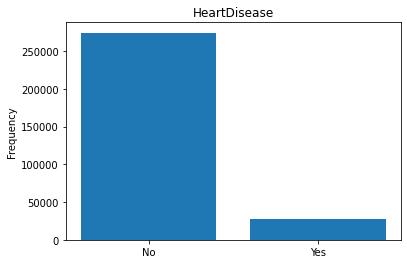

HeartDisease: 
 No     274456
Yes     27261
Name: HeartDisease, dtype: int64


In [10]:
# Heart Disease Plot
frequencies("HeartDisease")

***Look at this figure, we can see that the number of people without heart disease (274,456) is more ten times than people with heart disease(27,261). It means that our dataset has a serious data imbalance problem. This can lead to the classification results of the machine learning model not being highly reliable.***

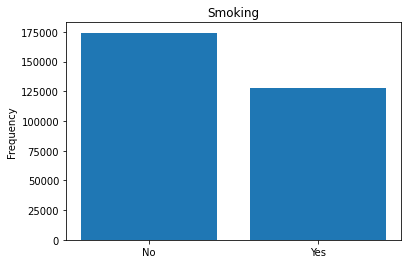

Smoking: 
 No     174312
Yes    127405
Name: Smoking, dtype: int64


In [11]:
# Smoking Plot
frequencies("Smoking")

***The number of non-smokers is more than the number of smokers. However, the amount of difference is not too big.***

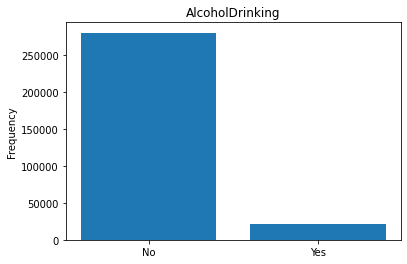

AlcoholDrinking: 
 No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64


In [12]:
# AlcolholDrinking Plot
frequencies("AlcoholDrinking")

***There's a huge difference between people who drink alcoholic beverages and those who don't. Among those surveyed, the number of alcoholic drinkers is 10 times higher than that of non-alcoholic drinkers.***

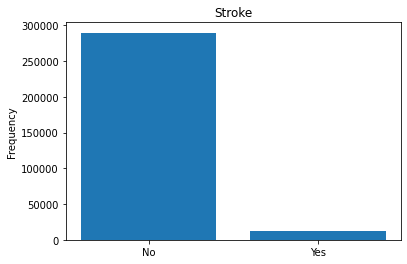

Stroke: 
 No     289653
Yes     12064
Name: Stroke, dtype: int64


In [13]:
# Stroke Plot
frequencies("Stroke")

***Sharing the same trend with Alcohol Drinking, the number of people with stroke in the surveyed data is twenty-four times less than the number of people without a history of stroke.***

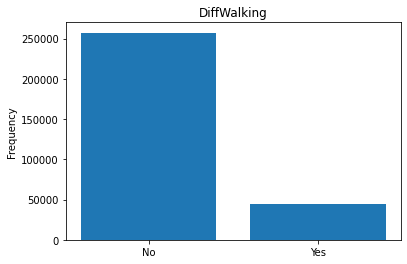

DiffWalking: 
 No     257362
Yes     44355
Name: DiffWalking, dtype: int64


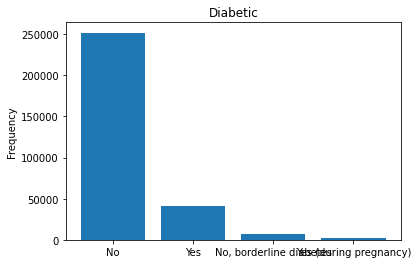

Diabetic: 
 No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64


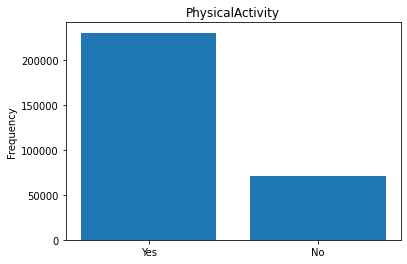

PhysicalActivity: 
 Yes    230412
No      71305
Name: PhysicalActivity, dtype: int64


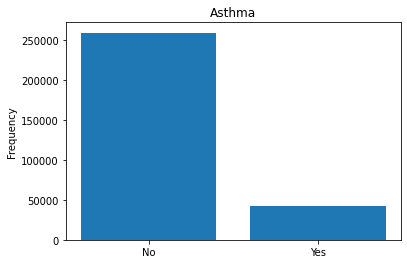

Asthma: 
 No     259066
Yes     42651
Name: Asthma, dtype: int64


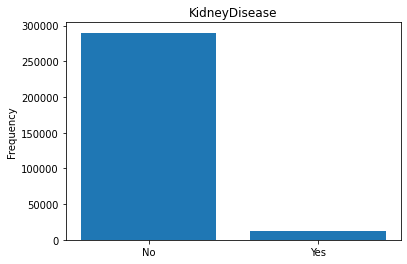

KidneyDisease: 
 No     289941
Yes     11776
Name: KidneyDisease, dtype: int64


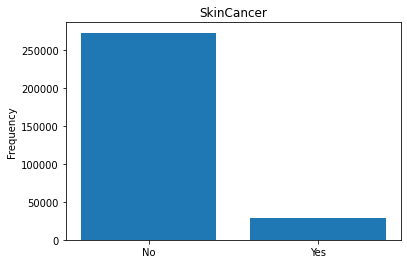

SkinCancer: 
 No     272425
Yes     29292
Name: SkinCancer, dtype: int64


In [14]:
# Plot other DiffWalking and other diseases
list_= ["DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
for i in range(0, len(list_)):
    frequencies(list_[i])

***The above attributes have a common tendency that the uninfected people are always many times more numerous than the infected people***

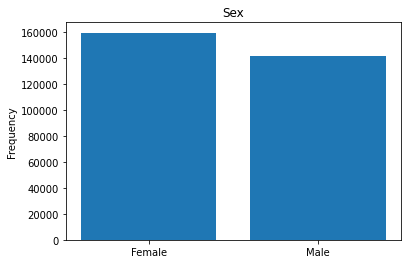

Sex: 
 Female    159671
Male      142046
Name: Sex, dtype: int64


In [15]:
# Gender Plot
frequencies("Sex")

***The number of men is more than that of women, however, the gender distribution of the data set does not have a big difference.***

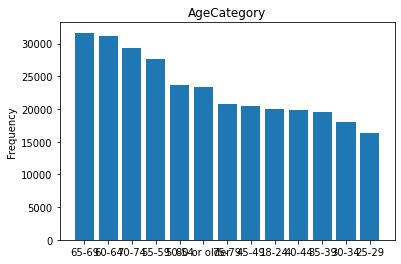

AgeCategory: 
 65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64


In [16]:
# AgeCategory Plot
frequencies("AgeCategory")

***Age distribution is quite even, in which the number of people aged 65 to 69 accounts for the largest number, and the number of people aged 25 to 29 has the smallest number.***

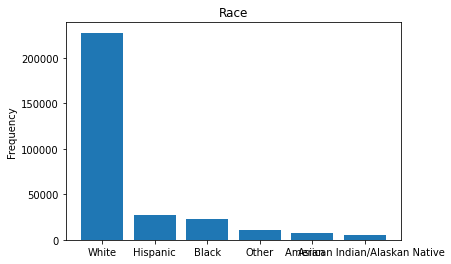

Race: 
 White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64


In [17]:
# Race Plot
frequencies("Race")

***Whites make up the majority of the data surveyed while American Indians or Alaskans make up the least (roughly one in forty-fourth whites).***

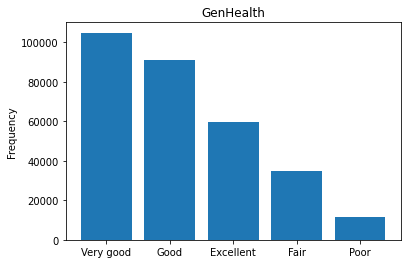

GenHealth: 
 Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64


In [18]:
#GenHealth Plot
frequencies("GenHealth")

***Most survey participants have good to very good health, only a small number (about 11286/301717 * 100 = 3.74%) have poor health.***

#### *2. Numerical Variable*

In [19]:
# Select only numerical variables
data_num=data.select_dtypes(include=["float64"])
data_num.head(5)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [20]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301717.0,28.441970,6.468134,12.02,24.03,27.41,31.65,94.85
PhysicalHealth,301717.0,3.572298,8.140656,0.00,0.00,0.00,2.00,30.00
MentalHealth,301717.0,4.121475,8.128288,0.00,0.00,0.00,4.00,30.00
SleepTime,301717.0,7.084559,1.467122,1.00,6.00,7.00,8.00,24.00


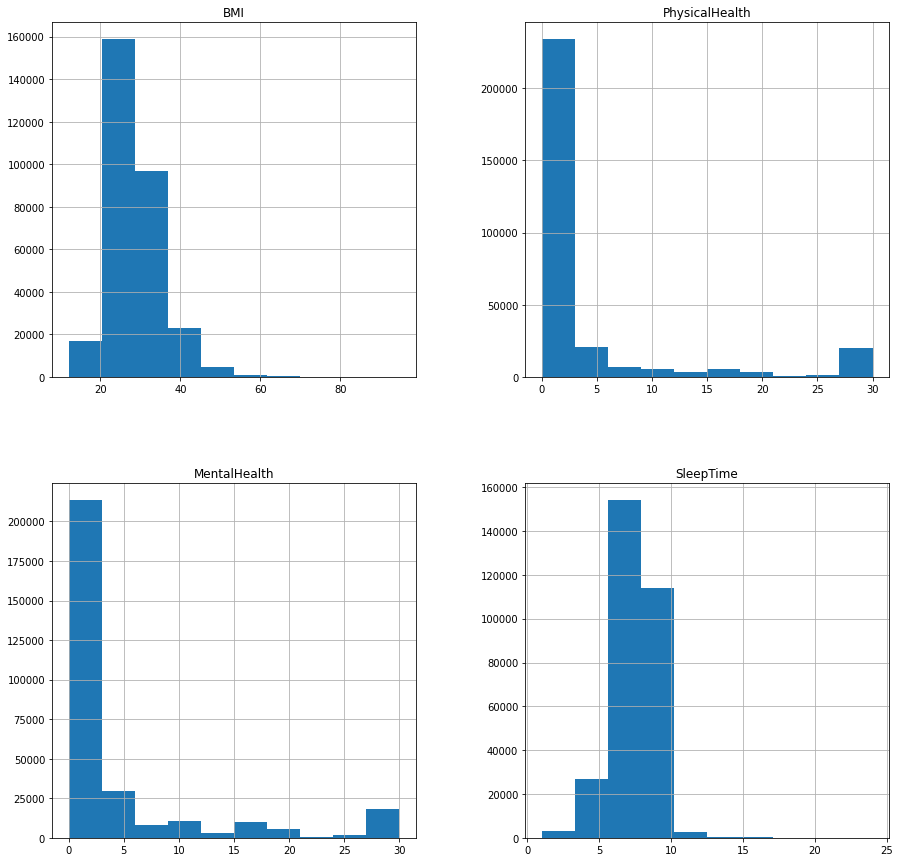

In [21]:
data_num.hist(figsize = (15,15))
plt.show()

***Most of people in dataset have BMI index ideally ( from 18.5 to 24.9), number of days feel unwell is smaller than three days a months, less than 3 days in poor mental health amonth and sleep time is from 5 to 8.***

#### *3. Correlation Plot*

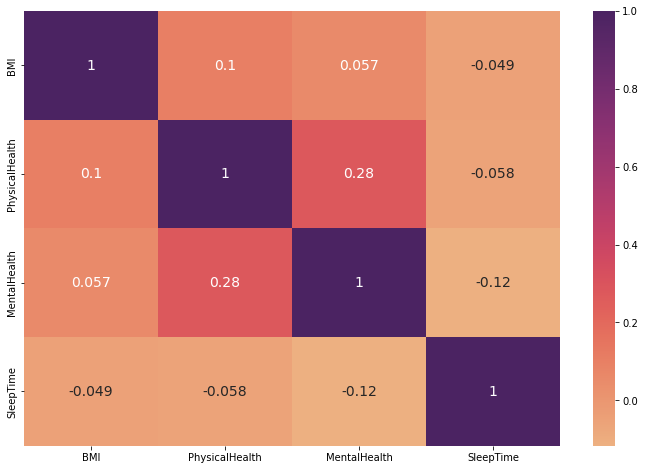

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12,8))
corr_matrix = data_num.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap = "flare", annot=True, ax = ax, annot_kws = {"size":14})

**We can see that *PhysicalHealth* and *MentalHealth* has the highest correlation score (0.28). Following is *BMI* and *PhysicalHealth* with 0.1 and *BMI* with *MentalHealth* is 0.057.**

### 2.2.2. Understanding Relationship between HeartDisease and all data features

#### 1. Heart Disease and Numeric Features

In [23]:
data_num.columns
data_num1 = data_num.join(data['HeartDisease'])

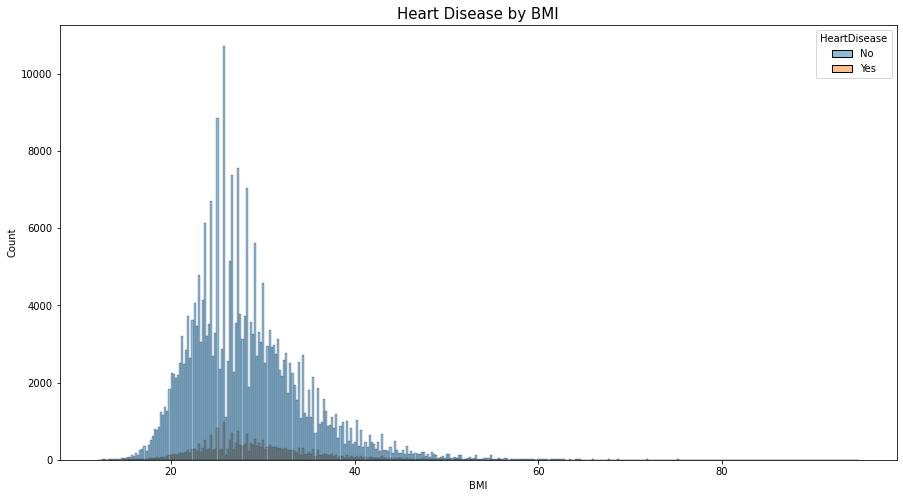

In [24]:
# 1. Heart Disease and BMI
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(ax=axes, data=data_num1, x=data_num1["BMI"], hue=data_num1["HeartDisease"], element="bars")
plt.title('Heart Disease by BMI', fontsize = 15)
plt.show()

***Look at above figure, we can say that people have ideally BMI or not are more likely to have heart disease.***

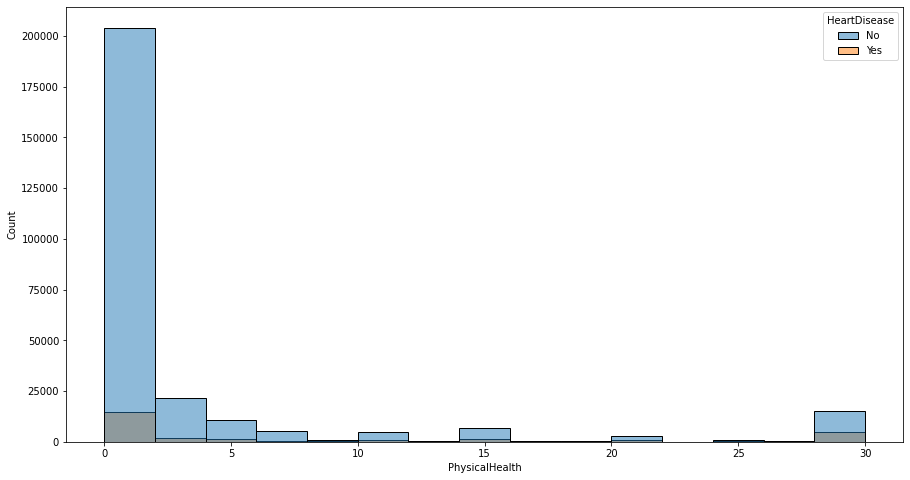

In [25]:
# 2. Physical Health and HeartDisease

fig,axes = plt.subplots(figsize=(15,8))
sns.histplot(ax=axes,bins =15, data=data_num1.sort_values(by="PhysicalHealth"), x="PhysicalHealth", hue="HeartDisease") 

plt.show()

***Because the heavily imbalanced of data in "HeartDisease" column, so we can not see the distribution of "PhysicalHealth" in this figure.
Nevertheless, we can conclude that if a person has "PhysicalHealth" index greater than 15,000, she or he will definitely does not have heart disease.***

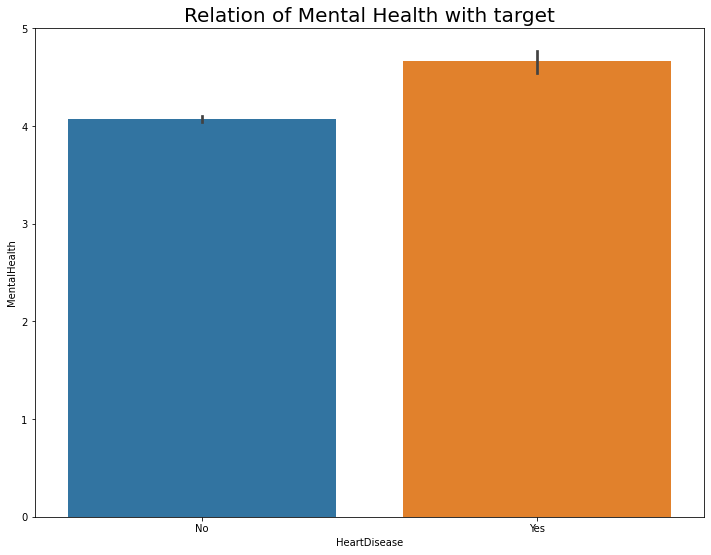

In [26]:
# 3. Mental Health and Heart Disease
plt.rcParams['figure.figsize'] = (12, 9)
sns.barplot(data_num1['HeartDisease'], data_num1['MentalHealth'])
plt.title('Relation of Mental Health with target', fontsize = 20)
plt.show()

***We can see that the higher a person's mental health index, the higher the risk of heart disease.  Especially when this index is higher than 4.***

#### 2. Heart Disease and Catergorical Features

In [27]:
data_cat.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

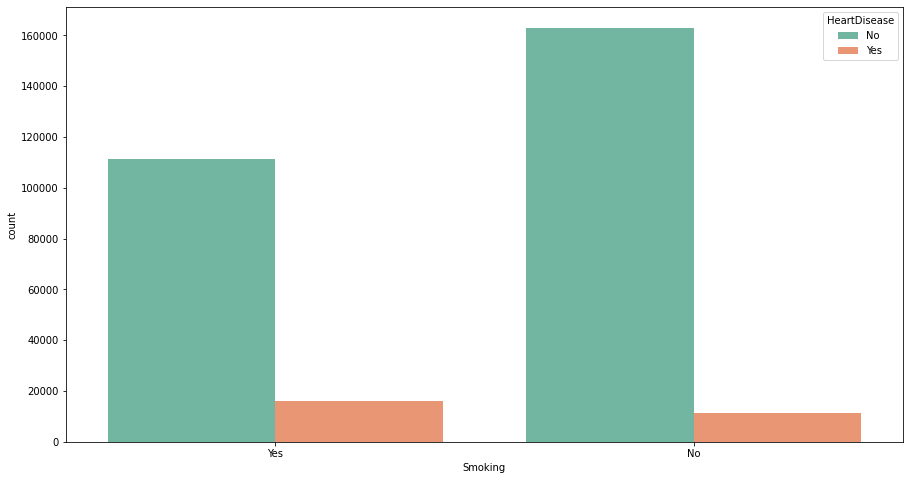

In [28]:
# 1. HeartDisease and Smoking
fig,axes = plt.subplots(figsize=(15,8))
sns.countplot(x = data_cat["Smoking"], ax = axes, hue="HeartDisease", data=data_cat, palette="Set2")
plt.show()

***From above figure, we can conclude that non-smokers have lower risk of heart disease than smokers.Conversely, people who are heavily smokers have a higher risk of heart disease.*** 

In [29]:
# Create the function to visualize pie chart for Boolen Columns

def Draw_pie_chart(name_feature):

    fig,axes = plt.subplots(1,2,figsize=(15,8))
    labels = data[name_feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data.HeartDisease=="No"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No Heart Disease',fontsize=15)
    axes[1].pie(data[data.HeartDisease=="Yes"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes Heart Disease',fontsize=15)

    plt.legend(title = name_feature, fontsize=15, title_fontsize=15)
    plt.show()
    
# References code from : https://www.kaggle.com/code/hiiammrcat/heart-disease-data-understanding, cell 15

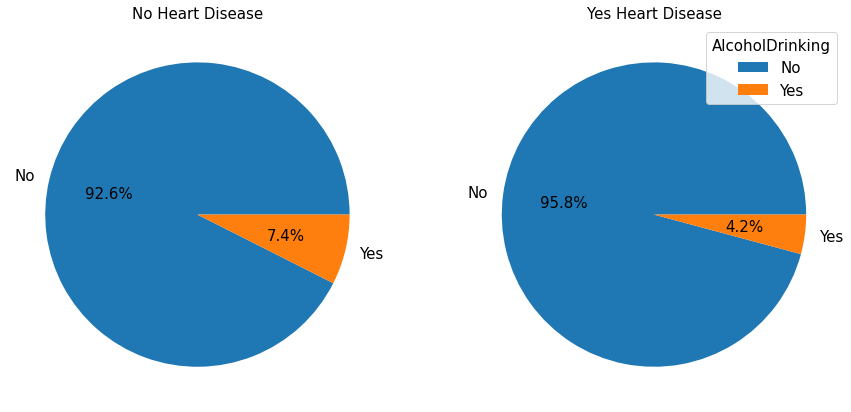

In [30]:
# HeartDisease vs AlcoholDrinking

Draw_pie_chart("AlcoholDrinking")

***There is only 4.2% people who have heart disease and drink alcohol, While there is 7.4% people who do not have heart disease but drink alcolhol.
This happens maybe because of the huge different between the amount of people who have heart disease and do not in this dataset.
So we can not conclude that a people can have higher risk of heart disease if he or she drink alcohol.***

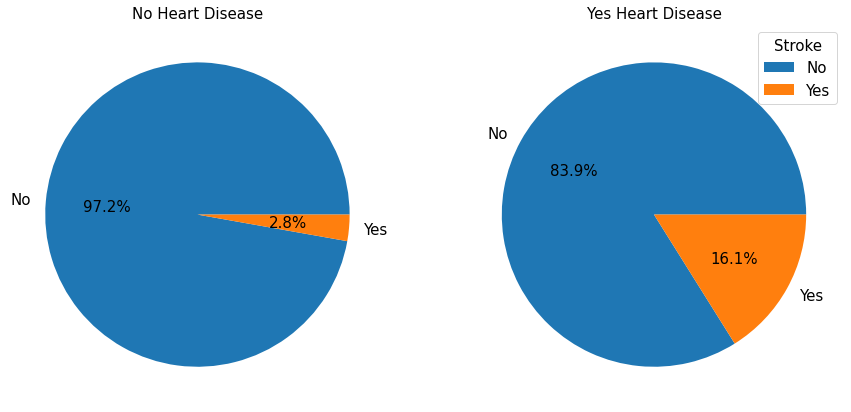

In [31]:
# Heart Disease vs Stroke
Draw_pie_chart("Stroke")

***Although only 16.1% of people with heart disease have had Stroke, this number is bigger than people who are without heart disease and have had Stroke, so it is clear to see that people who have had a stroke will have a higher risk of heart disease than others.***

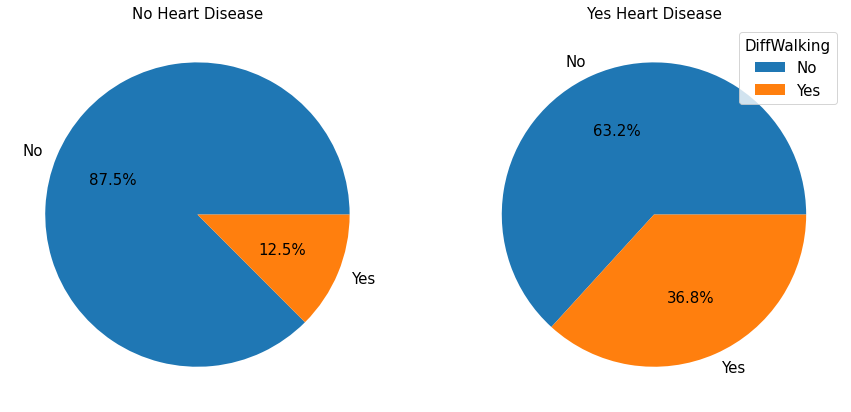

In [32]:
# Heart Disease with DiffWalking
Draw_pie_chart("DiffWalking")

***In the same vein as stroke, people who have difficulty walking and moving also have a higher risk of heart disease than those who are able to move and walk normally.***

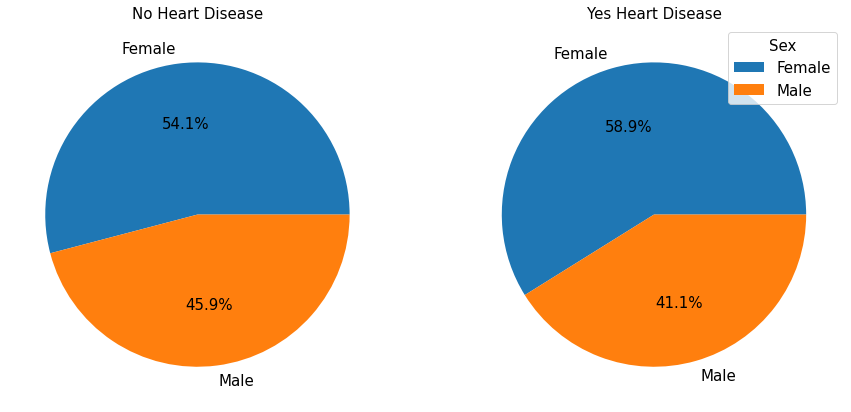

In [33]:
# Heart Disease with Sex 
Draw_pie_chart("Sex")

***Because there are more women than men in the data set, it is understandable that more women have heart disease than men. Therefore, we cannot conclude whether gender affects the risk of heart disease or not.***

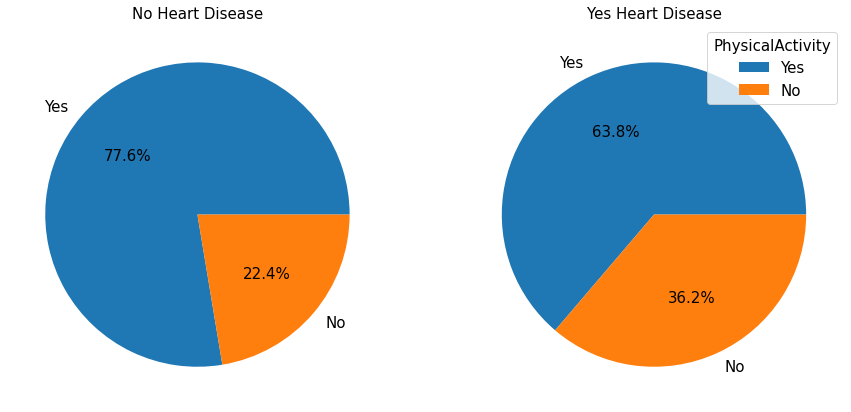

In [34]:
# Heart Disease with PhysicalActivity 
Draw_pie_chart("PhysicalActivity")

**In the graph of the number of people with heart disease, people who often do exercise has a higher percentage of people who do not exercise regularly, even though exercise is one of the activities that promote health.***

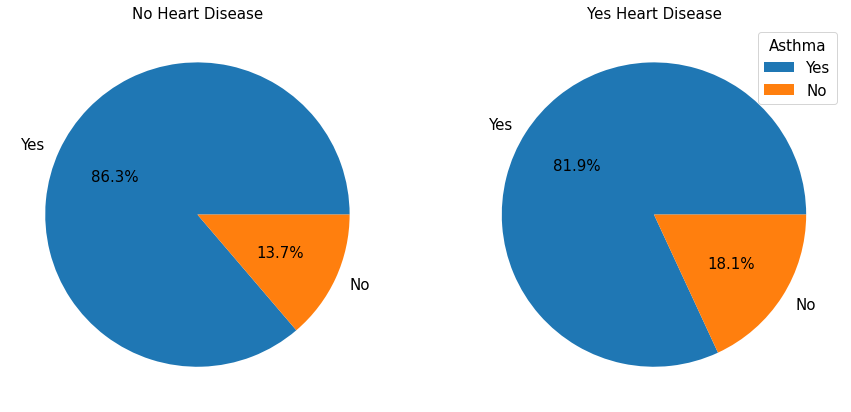

In [35]:
# Heart Disease with Asthma
Draw_pie_chart("Asthma")

***Up to 89.1% of people with heart disease have had Asthma. This means people who have had Asthma will have higher risk of heart disease.***

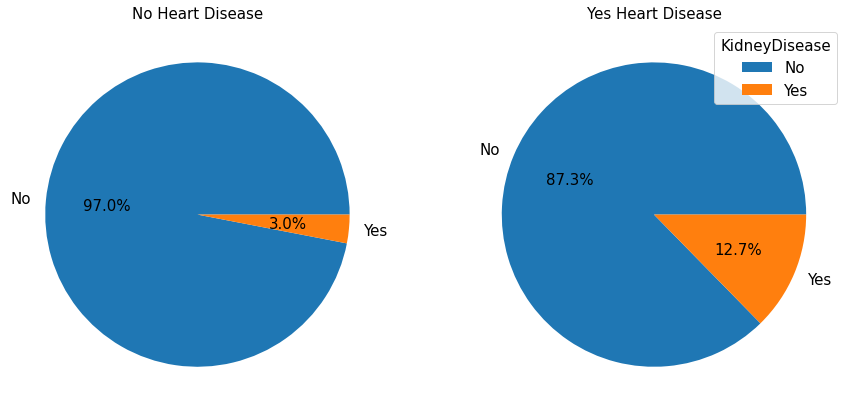

In [36]:
# Heart Disease with KidneyDisease
Draw_pie_chart("KidneyDisease")

***The analysis was similar to "Stroke", people with a history of Kidney Disease were also more likely to have heart disease than the rest.***

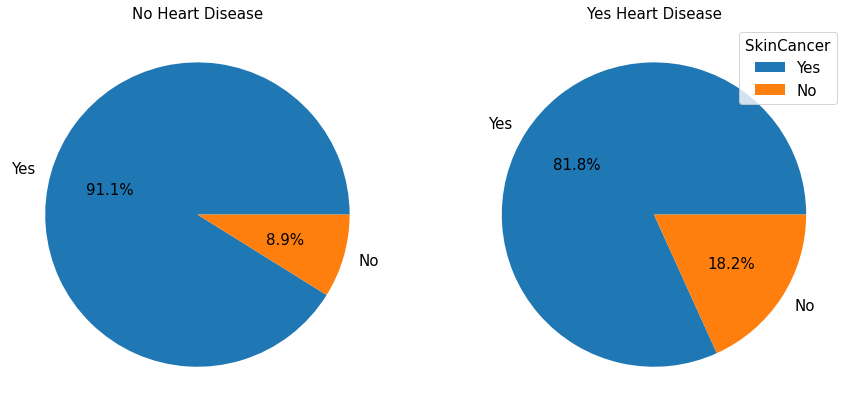

In [37]:
# Heart Disease with SkinCancer
Draw_pie_chart("SkinCancer")

***There are 81.8% people with heart disease have had Skin Cancer. This means that if a person have Sin Cancer, she or he has a higher risk of heart disease than other people.***

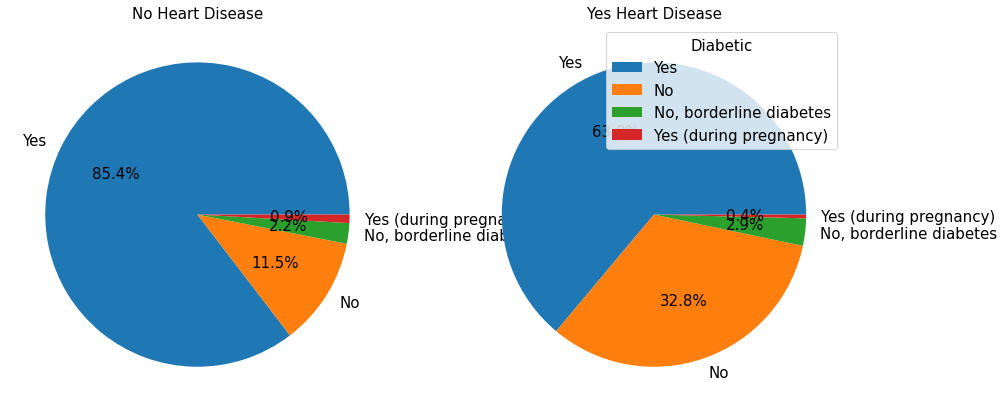

In [38]:
# Heart Disease with Diabetic
Draw_pie_chart("Diabetic")

***It is clear to conclude that people with diabetes are more likely to have heart disease than people without diabetes.***

### Overall, we can see features like Stroke, DiffWalking, Physical Activity, Kidney Disease. Diabetic and Skin Cancer affect most people who have Heart Disease than people who don't have Heart Disease.

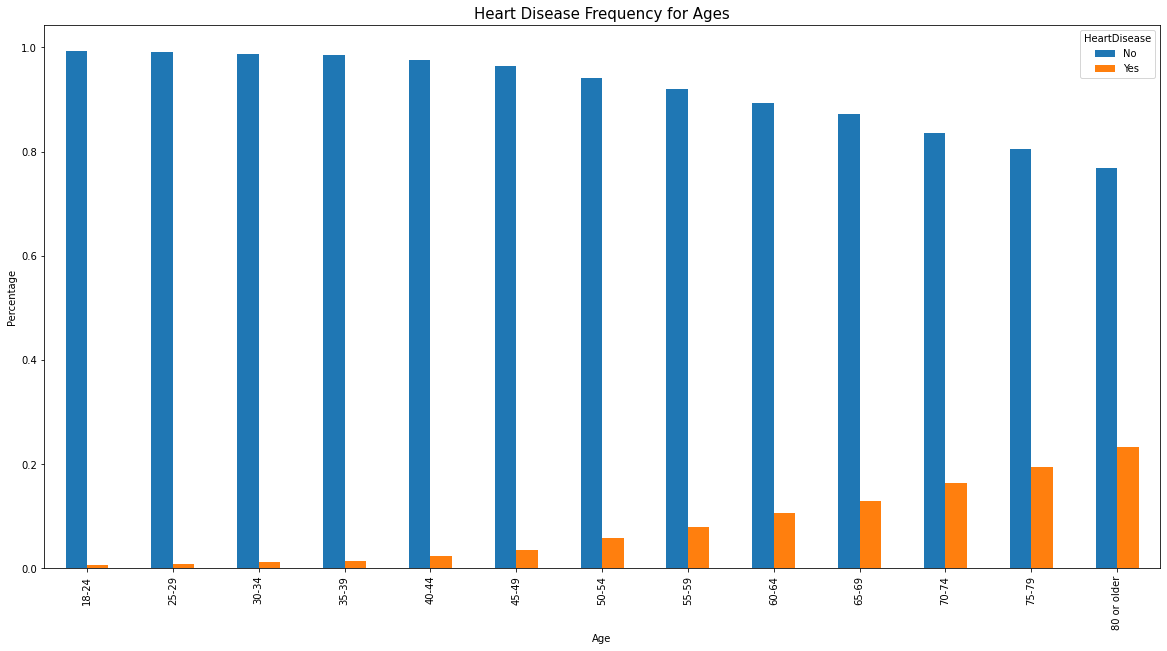

In [39]:
# Heart Disease with Age Category
pd.crosstab(data_cat["AgeCategory"], data_cat["HeartDisease"], normalize='index').plot(kind="bar",figsize=(20,10))
plt.title('Heart Disease Frequency for Ages', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

***Look at this abr chart, we see that the rate of people without heart disease is always higher than the rate of people with heart disease, at all ages. This happens because in the data set there are more people without heart disease than the number of people with heart disease, and the distance is very big. Even so, We can still conclude that people can develop heart disease at any age. In particular, the older you are, the higher your risk of heart disease.***

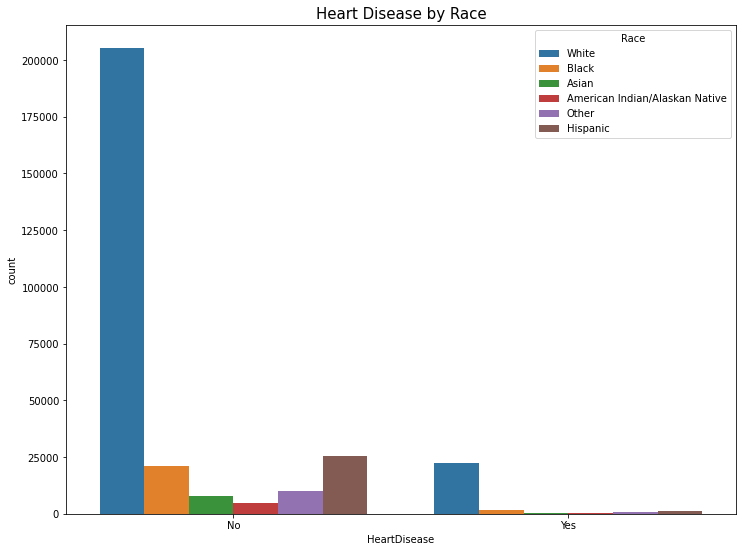

In [40]:
# Heart Disease with Race
sns.countplot(data_cat['HeartDisease'], hue=data_cat['Race'])
plt.title('Heart Disease by Race', fontsize = 15)
plt.show()

***This graph shows white people make up the largest number, and the distribution of data for both people with heart disease and without heart disease varies greatly.The rest of the races are similar, with more people without heart disease than people with.***

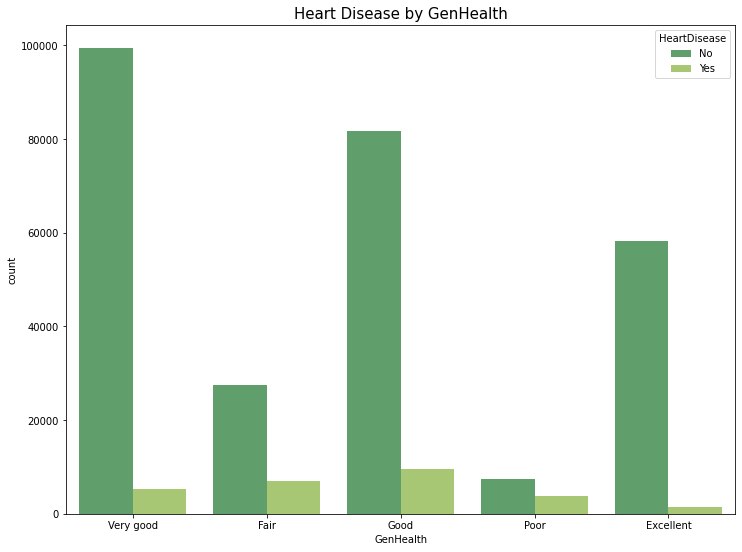

In [41]:
# Heart Disease with GenHealth
sns.countplot(data_cat['GenHealth'], hue=data_cat['HeartDisease'], palette="summer")
plt.title('Heart Disease by GenHealth', fontsize = 15)
plt.show()

***The chart shows that even when a person have a very good to excellent health in general, he or she can still have heart disease.***

## 2.3. OUTLIER DETECTION

In [42]:
data_num

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


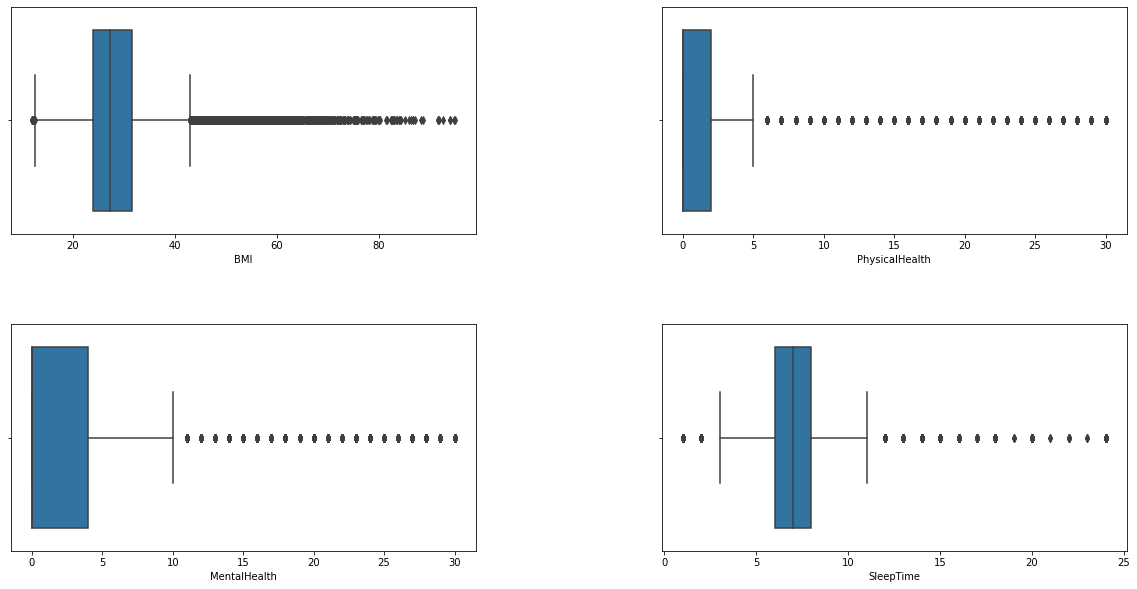

In [43]:
# Using Box Plot to see outlier values
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(2,2,1)
bmi_d = sns.boxplot(x=data_num['BMI'])

plt.subplot(2,2,2)
ph_d =sns.boxplot(x=data_num['PhysicalHealth'])


plt.subplot(2,2,3)
mh_d =sns.boxplot(x=data_num['MentalHealth'])


plt.subplot(2,2,4)
st_d =sns.boxplot(x=data_num['SleepTime'])

plt.show()


In [44]:
# Calculation of Interquartile Range
# References from this link: https://www.codegrepper.com/code-examples/python/how+to+calculate+iqr+in+pandas
# Sleep Time
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3-Q1
print("First Quartile: \n", Q1)
print("Third Quartile: \n", Q3)
print("Interquartile: \n", IQR)

First Quartile: 
 BMI               24.03
PhysicalHealth     0.00
MentalHealth       0.00
SleepTime          6.00
Name: 0.25, dtype: float64
Third Quartile: 
 BMI               31.65
PhysicalHealth     2.00
MentalHealth       4.00
SleepTime          8.00
Name: 0.75, dtype: float64
Interquartile: 
 BMI               7.62
PhysicalHealth    2.00
MentalHealth      4.00
SleepTime         2.00
dtype: float64


In [45]:
# Define lower and Upper limit
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("Lower Limit: \n", lower_limit)
print("Upper Limi: \n", upper_limit)

Lower Limit: 
 BMI               12.6
PhysicalHealth    -3.0
MentalHealth      -6.0
SleepTime          3.0
dtype: float64
Upper Limi: 
 BMI               43.08
PhysicalHealth     5.00
MentalHealth      10.00
SleepTime         11.00
dtype: float64


In [46]:
# # Remove the outliers using IQR

data_new = data[~((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any(axis=1)]
data_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


## 2.4. DATA TRANSFROMATION

In [47]:
# Check unique value for data tranformation
for feature in data_new.columns:
    print(feature)
    print(data_new[feature].unique(),"\n")

HeartDisease
['No' 'Yes'] 

BMI
[20.34 24.21 31.64 ... 15.57 27.43 40.7 ] 

Smoking
['No' 'Yes'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['Yes' 'No'] 

PhysicalHealth
[0. 5. 1. 2. 4. 3.] 

MentalHealth
[ 0.  2.  5.  4.  3. 10.  8.  1.  7.  6.  9.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['80 or older' '75-79' '65-69' '55-59' '50-54' '70-74' '60-64' '45-49'
 '18-24' '35-39' '40-44' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Good' 'Fair' 'Excellent' 'Poor'] 

SleepTime
[ 7.  6.  9.  5. 10.  8.  4.  3. 11.] 

Asthma
['No' 'Yes'] 

KidneyDisease
['No' 'Yes'] 

SkinCancer
['No' 'Yes'] 



In [48]:
data_new["HeartDisease"].replace({"Yes":1, "No":0}, inplace=True)
data_new["Sex"].replace({"Male": 1, "Female":0}, inplace=True)
data_new["Smoking"].replace({"No":0, "Yes":1}, inplace = True)
data_new["AlcoholDrinking"].replace({"Yes":1, "No":0}, inplace=True)
data_new["Stroke"].replace({"Yes":1, "No":0}, inplace=True)
data_new["DiffWalking"].replace({"No":0, "Yes":1}, inplace=True)
data_new["AgeCategory"].replace({"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, 
                            "60-64":8, "65-69":9, "70-74":10,"75-79":11, "80 or older": 12}, inplace=True)
data_new["Race"].replace({'White':0, 'Black':1, 'Asian':2, 'American Indian/Alaskan Native':3,
                      'Hispanic':4, 'Other':5}, inplace=True)
data_new["Diabetic"].replace({'No':0, 'No, borderline diabetes':0, 'Yes':1, 'Yes (during pregnancy)':1}, inplace=True)
data_new["PhysicalActivity"].replace({"Yes": 1, "No":0}, inplace=True)
data_new["GenHealth"].replace({'Poor':0,'Fair':1,'Good':2,'Very good':3, 'Excellent':4}, inplace=True)
data_new["Asthma"].replace({"Yes":1, "No":0}, inplace=True)
data_new["KidneyDisease"].replace({"Yes":1, "No":0}, inplace=True)
data_new["SkinCancer"].replace({"Yes":1, "No":0}, inplace=True)

In [49]:
data_new

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,0,1,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,0,0,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,0,0,1,2,10.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319786,1,33.20,1,0,0,0.0,0.0,0,0,8,4,1,1,3,8.0,1,0,0
319788,0,23.38,0,0,0,0.0,0.0,0,0,8,4,0,1,4,6.0,0,0,0
319789,0,22.22,0,0,0,0.0,0.0,0,0,0,4,0,1,4,8.0,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,4,0,1,3,5.0,1,0,0


In [50]:
#check data after transforming
for feature in data_new.columns:
    print(feature)
    print(data_new[feature].unique(),"\n")

HeartDisease
[0 1] 

BMI
[20.34 24.21 31.64 ... 15.57 27.43 40.7 ] 

Smoking
[0 1] 

AlcoholDrinking
[0 1] 

Stroke
[1 0] 

PhysicalHealth
[0. 5. 1. 2. 4. 3.] 

MentalHealth
[ 0.  2.  5.  4.  3. 10.  8.  1.  7.  6.  9.] 

DiffWalking
[0 1] 

Sex
[0 1] 

AgeCategory
[12 11  9  7  6 10  8  5  0  3  4  2  1] 

Race
[0 1 2 3 5 4] 

Diabetic
[0 1] 

PhysicalActivity
[1 0] 

GenHealth
[3 2 1 4 0] 

SleepTime
[ 7.  6.  9.  5. 10.  8.  4.  3. 11.] 

Asthma
[0 1] 

KidneyDisease
[0 1] 

SkinCancer
[0 1] 



## 2.5. CORRELATION AND COVARIANCE

### 2.5.1. Correlation Matrix

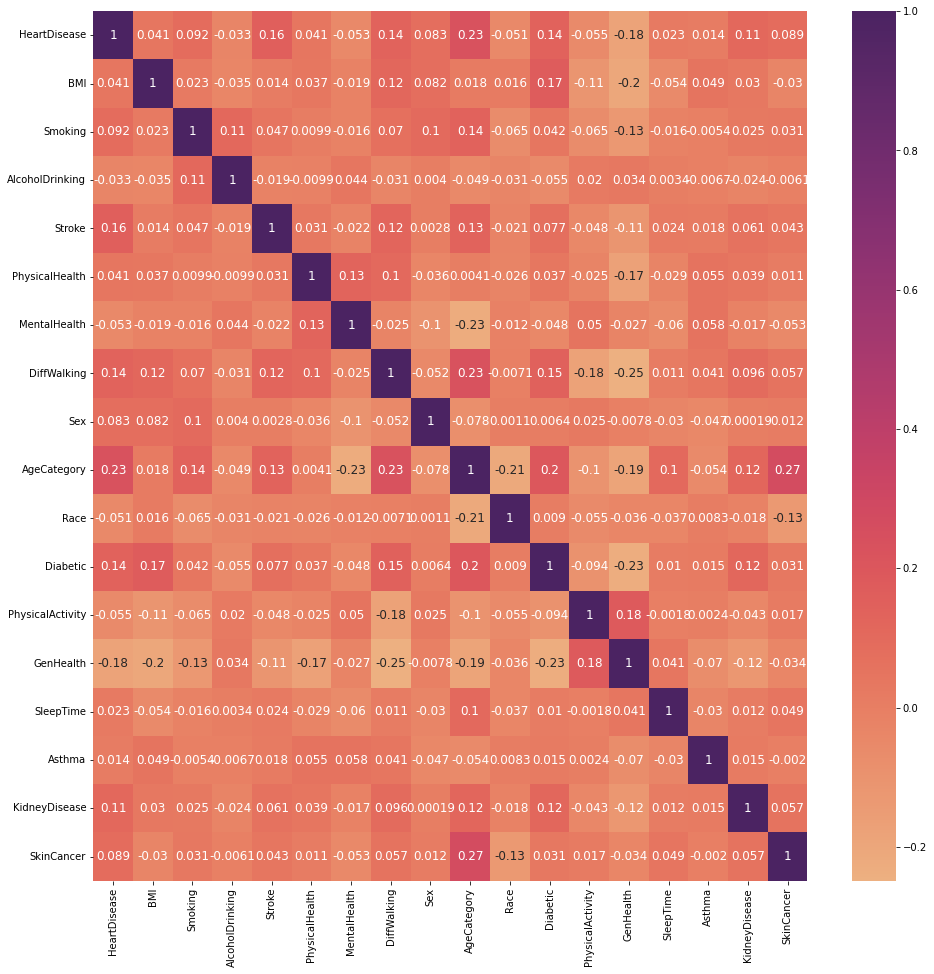

In [51]:
corr_matrix = data_new.corr()
fig, ax = plt.subplots(figsize = (16,16))
corr_heatmap = sns.heatmap(corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 12})
plt.show()

# References from : https://stackoverflow.com/questions/39409866/correlation-heatmap

***We want to only look at the Heart Disease to see which feature most correlated to Heart Disease, so we take Heart Disease in correlation matrix and sort by descending***

In [52]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.229956
Stroke              0.155351
Diabetic            0.140436
DiffWalking         0.135588
KidneyDisease       0.108094
Smoking             0.092443
SkinCancer          0.088916
Sex                 0.082766
PhysicalHealth      0.041460
BMI                 0.041453
SleepTime           0.022675
Asthma              0.014494
AlcoholDrinking    -0.032599
Race               -0.051090
MentalHealth       -0.052500
PhysicalActivity   -0.055275
GenHealth          -0.184372
Name: HeartDisease, dtype: float64

We see ***AgeCategory, Stroke, Diabetic, DiffWalking and KidneyDisease*** have most correlation with HeartDisease, but we not make sure these should be keep in training so we compare the covariance and see these features are tend to have same behavior with Heart Disease or inverse.

### 2.5.2. Covariance Matrix

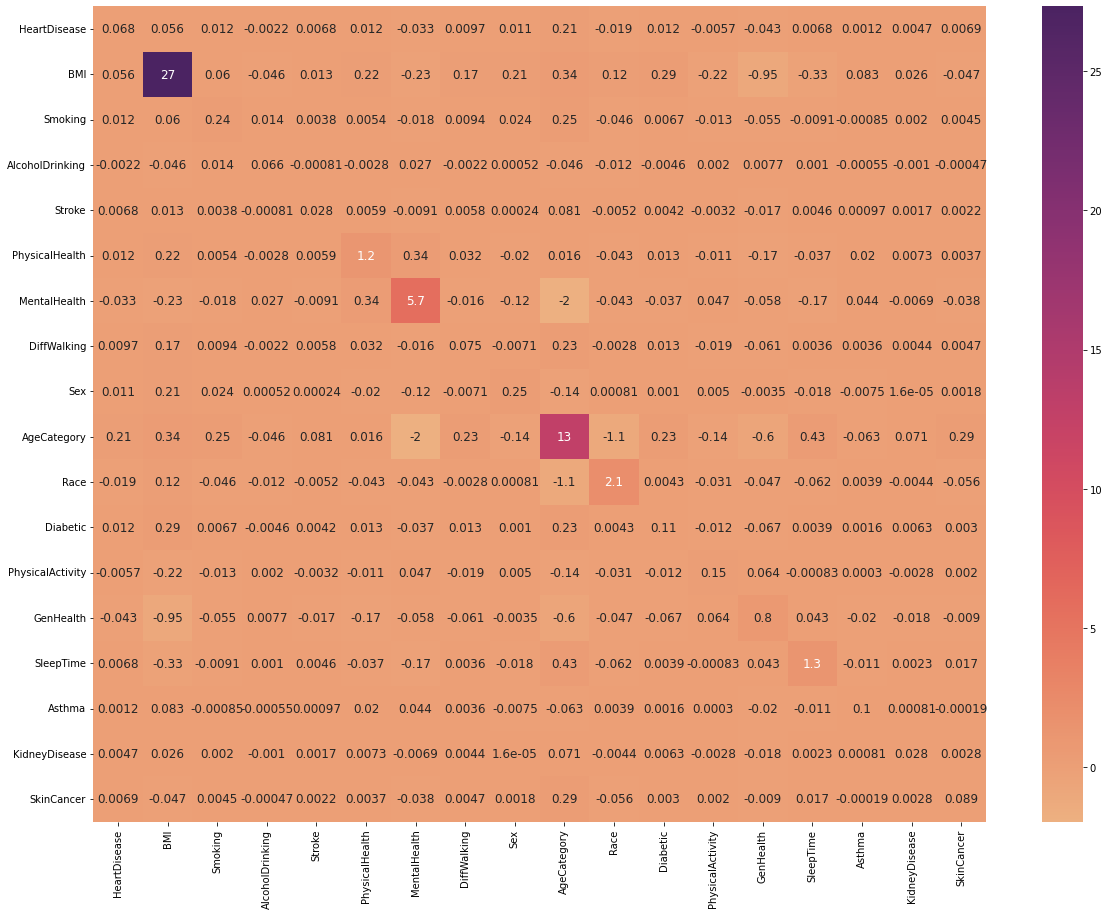

In [53]:
cov_matrix = data_new.cov()
fig, ax = plt.subplots(figsize = (20,15))
cov_heatmap = sns.heatmap(cov_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 12})
plt.show()

In [54]:
cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.214721
BMI                 0.056304
PhysicalHealth      0.012041
Diabetic            0.011876
Smoking             0.011731
Sex                 0.010752
DiffWalking         0.009661
SkinCancer          0.006878
Stroke              0.006808
SleepTime           0.006799
KidneyDisease       0.004660
Asthma              0.001207
AlcoholDrinking    -0.002174
PhysicalActivity   -0.005650
Race               -0.019281
MentalHealth       -0.032696
GenHealth          -0.042729
Name: HeartDisease, dtype: float64

We can see ***AgeCategory, BMI, PhysicalHealth, Diabetic and Smoking*** are top 5 features that have the highest covariance with HeartDisease.

Combined with the correlation matrix, we can come to the conclusion that **AgeCategory, Diabetic, Stroke, DiffWalking, KidneyDisease and PhysicalHealth** are the most important features.

### 2.6. DATA NORMALIZATION

In [55]:
# References from: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()

num_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
data_new_num = data_new[num_features].copy()
data_encoded = data_new.drop(labels=["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"], axis=1)

In [56]:
data_num_scaler = stand_scale.fit_transform(data_new_num)
data_num_scaler = pd.DataFrame(data_num_scaler, columns = num_features)
data_num_scaler 

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.398872,-0.389488,-0.483592,-0.120183
1,-0.658541,-0.389488,-0.483592,-0.986825
2,0.762817,4.083782,-0.483592,1.613099
3,-0.230029,-0.389488,-0.483592,-1.853466
4,2.494081,-0.389488,-0.483592,2.479740
...,...,...,...,...
222526,1.061245,-0.389488,-0.483592,0.746458
222527,-0.817320,-0.389488,-0.483592,-0.986825
222528,-1.039228,-0.389488,-0.483592,0.746458
222529,0.418477,-0.389488,-0.483592,-1.853466


In [57]:
data_new_scaler = pd.merge(data_encoded, data_num_scaler,left_index=True, right_index=True)
data_new_scaler

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
1,0,0,0,1,0,0,12,0,0,1,3,0,0,0,-0.658541,-0.389488,-0.483592,-0.986825
3,0,0,0,0,0,0,11,0,0,0,2,0,0,1,-0.230029,-0.389488,-0.483592,-1.853466
7,0,1,0,0,1,0,12,0,1,0,2,1,0,0,0.292220,0.505166,-0.483592,-0.986825
8,0,0,0,0,0,0,12,0,0,0,1,0,1,0,-0.266376,4.083782,0.350840,2.479740
9,0,0,0,0,1,1,9,0,0,1,2,0,0,0,0.422303,-0.389488,-0.483592,-1.853466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222524,1,1,0,0,1,0,8,0,0,1,1,1,0,0,-0.205160,-0.389488,-0.483592,-0.986825
222525,0,1,0,0,0,1,11,0,0,1,3,0,0,1,0.818294,-0.389488,-0.483592,-0.120183
222526,0,0,0,0,0,0,7,0,0,0,3,0,0,0,1.061245,-0.389488,-0.483592,0.746458
222529,0,1,0,0,0,1,6,0,0,1,4,0,0,0,0.418477,-0.389488,-0.483592,-1.853466


# III. Heart Disease Classification

## 3.1. Handle Imbalanced Data

references from: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [58]:
# define dataset
X = data_new_scaler.drop(columns=['HeartDisease'],axis=1)
y = data_new_scaler["HeartDisease"]
data_new_scaler.shape

(158240, 18)

In [59]:
num_class0, num_class1 = data_new_scaler["HeartDisease"].value_counts()
print("0:  ", num_class0)
print("1:  ", num_class1)

0:   146856
1:   11384


### Over Sampling

In [60]:
#pip install imbalanced-learn --user

In [61]:
from imblearn.over_sampling import RandomOverSampler
#oversample1 = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X, y)
X_over.shape, y_over.shape

((220284, 17), (220284,))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size =0.2, random_state = 42)

## 3.2. Classification Model

### Cross-validation
references from: https://vitalflux.com/k-fold-cross-validation-python-example/

In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

strtfdKFold = StratifiedKFold(n_splits = 5)
kfold = strtfdKFold.split(X_train, y_train)

### 1. Decison Tree
**Decision trees is a supervised machine learning model with simple decision-making process and high execution efficiency. It is suitable for the prediction of classification and regression data types.** 

Some key term of Decision Tree:
- Root node: The base of the decision tree.
- Splitting: The process of dividing a node into multiple sub-nodes.
- Decision node: When a sub-node is further split into additional sub-nodes. 
- Leaf node (Terminal Node): When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
- Branch: A subsection of the decision tree consisting of multiple nodes.

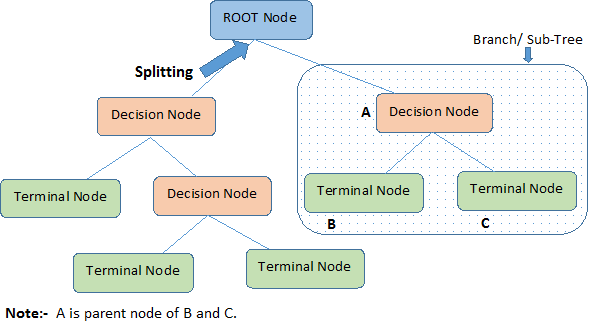

- Above is an image explaining the basic structure of the decision tree. Every tree has a root node, where the inputs are passed through. This root node is further divided into sets of decision nodes where results and observations are conditionally based. The process of dividing a single node into multiple nodes is called splitting. If a node doesn’t split into further nodes, then it’s called a leaf node, or terminal node. A subsection of a decision tree is called a branch or sub-tree.

- There is also another concept that is quite opposite to splitting. If there are ever decision rules which can be eliminated, we cut them from the tree. This process is known as pruning, an is useful to minimize the complexity of the algorithm.






In [64]:
# Define a function to plot confusion matrix
def plot_cf(y_test, y_pred, title):
    con_mat=confusion_matrix(y_test,y_pred)
    plt.style.use('seaborn-deep')
    plt.figure(figsize=(6,6))
    sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
    plt.title(title, fontweight='bold',fontsize=15)
    plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier

model_dc = DecisionTreeClassifier(random_state=42)
dc_scores = []
for k, (train, test) in enumerate(kfold):
    model_dc.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = model_dc.score(X_train.iloc[test, :], y_train.iloc[test])
    dc_scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(dc_scores), np.std(dc_scores)))

Fold:  1, Training/Test Split Distribution: [94105 46876], Accuracy: 0.933
Fold:  2, Training/Test Split Distribution: [94104 46877], Accuracy: 0.935
Fold:  3, Training/Test Split Distribution: [94105 46877], Accuracy: 0.932
Fold:  4, Training/Test Split Distribution: [94105 46877], Accuracy: 0.934
Fold:  5, Training/Test Split Distribution: [94105 46877], Accuracy: 0.931


Cross-Validation accuracy: 0.933 +/- 0.001


In [66]:
dc_pred = model_dc.predict(X_test)
accuracy_rf = accuracy_score(y_test, dc_pred)
print("Classification Report: \n", classification_report(y_test, dc_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     29225
           1       0.84      0.99      0.91     14832

    accuracy                           0.93     44057
   macro avg       0.92      0.95      0.93     44057
weighted avg       0.94      0.93      0.93     44057



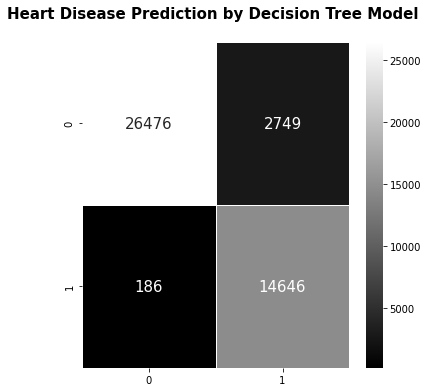

In [67]:
plot_cf(y_test, dc_pred, "Heart Disease Prediction by Decision Tree Model \n")

***With the Decision Tree model, we achieved a 93% accuracy on test dataset- a pretty high score.***
- Looking at the confusion matrix above, we can see that there are 14,646 people who actually had heart disease and the model also predicted that they had heart disease, while there were only 186 people with heart disease model predicted wrong. It means that Decision Tree model was 99 percent accurate in predicting people with heart disease. 
- Besides, there were 2749 people without heart disease but model predicted that they had heart disease. However, this number is only a very small percentage, accounting for just 8 percent of people without heart disease in the test data set.

### 2. Random Forest
***Random Forest is a supervised machine learning model which can be said to be an advanced version of decision tree because it’s composed of many decision trees. It is used widely in classification and regression problem.***

- Random Forest uses bagging (Bootstrap Aggregation) which is the ensemble technique. Bagging chooses a random sample from the dataset. Hench each model is generated from the samples (Bootstrap Samples) provided by the original data with the replacement known as row sampling. 
- The step of row sampling with the replacement is called bootstrap. Now each model is trained independently which generates result. The final output is based on majority voting after combining the result of all models (Aggregation) for classification problem and averaging for regression.

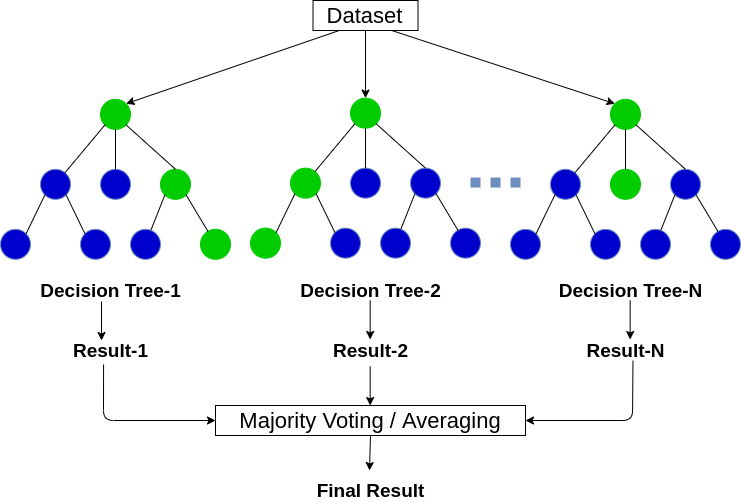

***Steps involved in random forest algorithm:***
- Step 1: In Random forest n number of random records are taken from the data set having k number of records.
- Step 2: Individual decision trees are constructed for each sample.
- Step 3: Each decision tree will generate an output.
- Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.


In [68]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

rf_scores = []
strtfdKFold = StratifiedKFold(n_splits = 5)
kfold = strtfdKFold.split(X_train, y_train)

for k, (train, test) in enumerate(kfold):
    model_rf.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = model_rf.score(X_train.iloc[test, :], y_train.iloc[test])
    rf_scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(rf_scores), np.std(rf_scores)))

Fold:  1, Training/Test Split Distribution: [94105 46876], Accuracy: 0.954
Fold:  2, Training/Test Split Distribution: [94104 46877], Accuracy: 0.954
Fold:  3, Training/Test Split Distribution: [94105 46877], Accuracy: 0.956
Fold:  4, Training/Test Split Distribution: [94105 46877], Accuracy: 0.954
Fold:  5, Training/Test Split Distribution: [94105 46877], Accuracy: 0.954


Cross-Validation accuracy: 0.955 +/- 0.001


In [69]:
rf_pred = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)
print("Classification Report: \n", classification_report(y_test, rf_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     29225
           1       0.90      0.99      0.94     14832

    accuracy                           0.96     44057
   macro avg       0.94      0.96      0.95     44057
weighted avg       0.96      0.96      0.96     44057



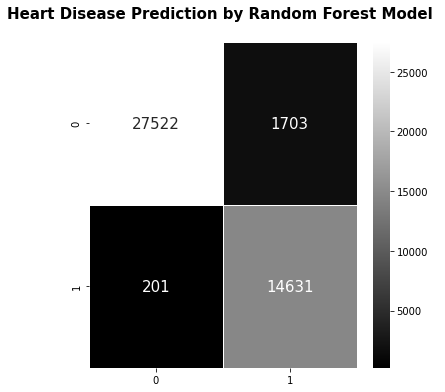

In [70]:
plot_cf(y_test, rf_pred, "Heart Disease Prediction by Random Forest Model \n")

***Random Forest model achieved 96% accuracy for test data, a pretty hight score. Look at the class 1 - what we care is people who got heart disease, we can see that the precision 89%, recall 99% and F1-score 94%. This is a good result we achieved on this dataset.***
- Of the 14,832 people who actually had heart disease, the Random Forest Model correctly predicted 14,631 people, representing 99%, and incorrectly predicted 201 people.
- In addition, there were 1703 people without heart disease but the model predicted that they did, representing 6 percent of all people without heart disease on the test dataset.

### 3. XGBoost

references: https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

- Boosting is an ensemble modeling technique that uses weak classifiers to create a strong classifier. This is done by building the model using weak models in tandem. First, build a model from training data. A second model is then built, which attempts to correct the errors that existed in the first model. Continue this process and add models until the full training dataset is correctly predicted or the maximum number of models is added.

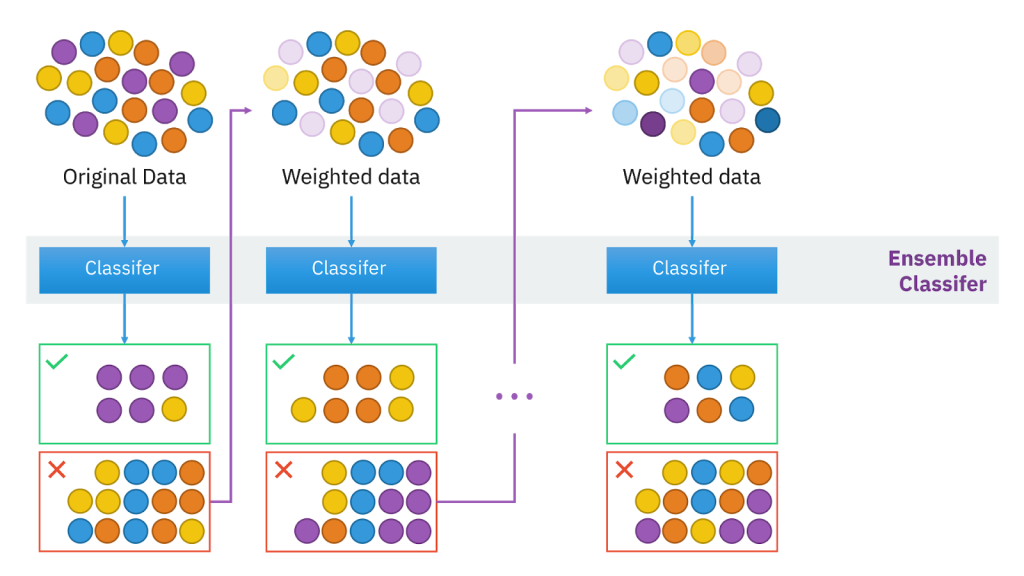

- XGBoost is the abbreviation of "Extreme Gradient Boosting", including 'Boosting', which means that it is a boosting integration algorithm, so its main idea is to combine hundreds of tree models into a model with high accuracy. This model generates new trees through constant iteration.


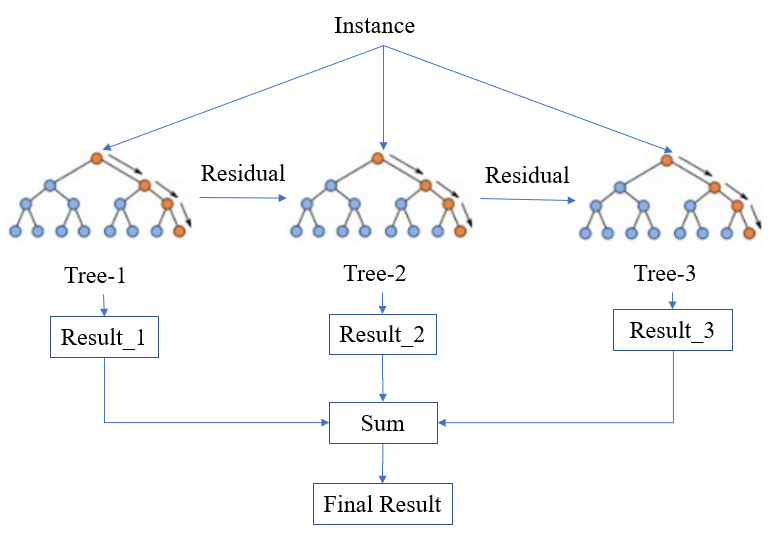

- Extreme Gradient Boosting is a Gradient Boosted Tree (GBDT). When the original model remains unchanged, a new function is added to the model to correct the errors of the previous tree, thereby improving the overall model. It is mainly used in supervised learning and can be used for classification and regression problems.

In [71]:
#pip install xgboost

In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}


# Init classifier
model_xgb = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(model_xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(X_over, y_over)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [73]:
# Best accuracy during training process
grid_cv.best_score_

0.862527701114349

In [74]:
# best combined parameters of xgboost
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [75]:
final_xgb = xgb.XGBClassifier(**grid_cv.best_params_, 
                              objective="binary:logistic")
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, ...)

In [76]:
xgb_pred = final_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_pred)
print("Classification Report: \n", classification_report(y_test, xgb_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.57      0.72     29225
           1       0.53      0.94      0.68     14832

    accuracy                           0.70     44057
   macro avg       0.74      0.76      0.70     44057
weighted avg       0.81      0.70      0.70     44057



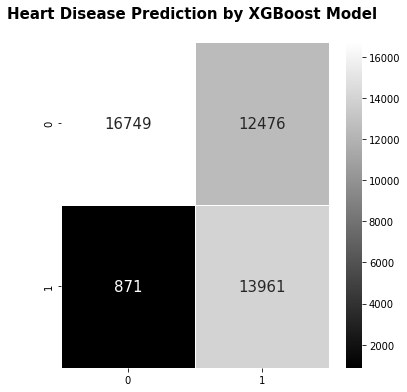

In [77]:
plot_cf(y_test, xgb_pred, "Heart Disease Prediction by XGBoost Model \n")

***The XGBoost Model got 70 percent on accuracy score - an acceptable but not a high score.***
- In confusion matrix above, we can see that out of a total of 14,832 people who actually had heart disease, 13,961 people were correctly predicted by the XGBoost model to have heart disease, but 871 people were wrongly predicted by the model (predicting they would not have heart disease).
- On the other hand, there are 12,476 people who did not have heart disease but XGBoost model predicted that they had heart disease - A large number of false predictions compared with the previous 2 models.

## 3.3. Choosing Important Features for Diagnostic

In [78]:
#pip install eli5
#pip install shap
#pip install pdpbox

In [79]:
import eli5 
from eli5.sklearn import PermutationImportance

import shap 
#from pdpbox import pdp, info_plots

# let's check the importance of each attributes
# Use Decision Tree model to caculate the feature Importance
perm = PermutationImportance(model_dc, random_state = 0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2358 ± 0.0027,AgeCategory
0.2113 ± 0.0033,BMI
0.1790 ± 0.0031,GenHealth
0.1238 ± 0.0025,Sex
0.0913 ± 0.0034,SleepTime
0.0801 ± 0.0022,Smoking
0.0655 ± 0.0016,Diabetic
0.0607 ± 0.0014,MentalHealth
0.0534 ± 0.0012,Race
0.0392 ± 0.0005,Stroke


In [80]:
# Use Random Forest model to caculate the feature Importance
rf_perm = PermutationImportance(model_rf, random_state = 0).fit(X_test, y_test)
eli5.show_weights(rf_perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2254 ± 0.0025,AgeCategory
0.1746 ± 0.0009,GenHealth
0.1574 ± 0.0021,BMI
0.1238 ± 0.0031,Sex
0.1062 ± 0.0021,Smoking
0.0997 ± 0.0021,SleepTime
0.0755 ± 0.0011,Diabetic
0.0627 ± 0.0014,MentalHealth
0.0618 ± 0.0017,Race
0.0534 ± 0.0016,PhysicalActivity


In [81]:
# Use Random Forest model to caculate the feature Importance
xgb_perm = PermutationImportance(final_xgb, random_state = 0).fit(X_test, y_test)
eli5.show_weights(xgb_perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1335 ± 0.0053,AgeCategory
0.0292 ± 0.0012,GenHealth
0.0194 ± 0.0018,Sex
0.0149 ± 0.0005,Stroke
0.0060 ± 0.0016,Diabetic
0.0059 ± 0.0009,BMI
0.0034 ± 0.0010,DiffWalking
0.0027 ± 0.0020,Smoking
0.0024 ± 0.0009,KidneyDisease
0.0022 ± 0.0012,MentalHealth


***Permutation importance reflect how important this feature is for a particular model.***

Therefore, from Permutation Importance of above models, we can see that top importance features are :
- AgeCategory
- GenHealth
- BMI
- Sex
- SleepTime
- Smoking
- Diabetic

# IV. Conclusion

Although the amount of Dataset big (approximately 320 thousand patients) and serious data imbalance problem, we achieve a quite high performance on both three machine learning models. Among these model, Random Forest achieved highest accuracy - 96%, and XGBoost achieved lowest accuracy - only 70%.

Beside that, we accurate top 6 important features for diagnostic is:
- AgeCategory
- GenHealth
- BMI
- Sex
- SleepTime
- Smoking